In [1]:
# Import basic libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# For timeseries RNN LSTM neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

2023-12-06 21:24:19.010611: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 21:24:19.162683: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-06 21:24:19.162711: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-06 21:24:20.056555: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
# Import Kera:TimeSeriesGenerator

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Import Keras:MinMax Scalar

from sklearn.preprocessing import MinMaxScaler

In [4]:
dir_path_dataset_1 = 'GOOG_1.csv'

### Load Data

In [5]:
df_ALL = pd.read_csv(dir_path_dataset_1)
df_ALL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
1,2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2,2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
3,2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
4,2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641


In [6]:
df_ALL.shape

(1382, 7)

In [7]:
df_ALL.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
# Statistic Summary

df_ALL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1.382000e+03
mean,47.627746,48.066592,47.193521,47.650752,47.650752,3.479765e+07
std,12.790044,12.941852,12.666063,12.815438,12.815438,1.710484e+07
min,24.664783,24.730902,24.311253,24.560070,24.560070,6.950000e+06
25%,37.039625,37.255625,36.800625,37.042999,37.042999,2.456500e+07
50%,48.563249,48.886751,48.226500,48.628999,48.628999,3.040600e+07
75%,57.438376,58.337350,57.045499,57.691000,57.691000,3.960400e+07
max,76.253502,76.605301,76.070000,76.334503,76.334503,2.232980e+08


### Keep only close price and filter out all other attributes

In [9]:
df = df_ALL.iloc[:,4:5]

In [10]:
df.head()

,Close
0,26.168653
1,25.623152
2,25.029282
3,24.986401
4,25.065184


<AxesSubplot:>

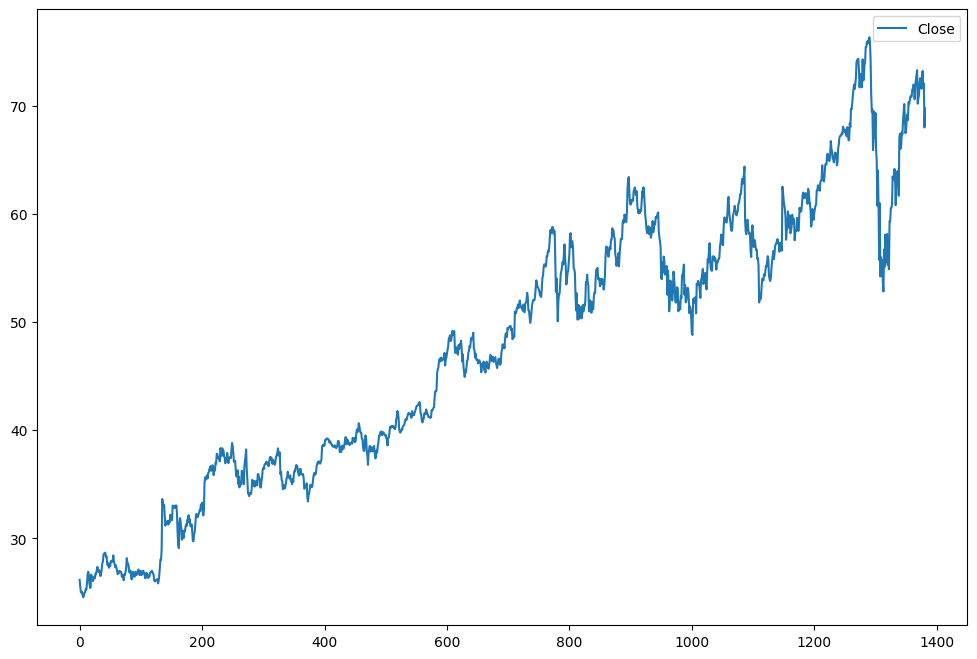

In [11]:
df.plot(figsize=(12,8))

### Length of input Time Series-Number of Input Time Steps

In [12]:
length60 = 60

In [13]:
length60

60

### Time Series Dataset: Train/ test split

In [14]:
len(df)

1382

In [15]:
# Set percentage of data used for testing

test_percent = 0.1

In [16]:
len(df)*test_percent

138.20000000000002

### Split Data -> Train/Test

In [17]:
test_length = np.round(len(df)*test_percent)
test_length

138.0

In [18]:
split_index = int(len(df)-test_length)

split_index

1244

In [19]:
data_train = df.iloc[:split_index]

In [20]:
data_test = df.iloc[split_index - length60:]

In [21]:
data_train.head(5)

,Close
0,26.168653
1,25.623152
2,25.029282
3,24.986401
4,25.065184


In [22]:
data_train.tail()

,Close
1239,66.027000
1240,66.406502
1241,67.030998
1242,67.178001
1243,67.233002


In [23]:
data_test.head(5)

,Close
1184,61.457500
1185,61.620499
1186,61.935501
1187,61.496498
1188,61.701500


In [24]:
data_test.tail()

,Close
1377,73.220497
1378,71.598503
1379,72.066498
1380,67.995003
1381,69.748497


### Normalize Data in range [0, 1]

In [25]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(data_train)

MinMaxScaler()

In [27]:
normalized_train = scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

### Create TimeseriesGenerator for Training

In [28]:
batch_size32 = 32

train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

In [29]:
len(normalized_train)

1244

In [30]:
len(train_tsGenerator60)

37

In [31]:
x,y = train_tsGenerator60[0]

In [32]:
x

array([[[0.03769563],
        [0.02491233],
        [0.01099554],
        ...,
        [0.07317118],
        [0.06519032],
        [0.06950209]],

       [[0.02491233],
        [0.01099554],
        [0.00999067],
        ...,
        [0.06519032],
        [0.06950209],
        [0.06479306]],

       [[0.01099554],
        [0.00999067],
        [0.01183687],
        ...,
        [0.06950209],
        [0.06479306],
        [0.05843643]],

       ...,

       [[0.06597323],
        [0.05876362],
        [0.05509455],
        ...,
        [0.04628063],
        [0.05509181],
        [0.05213914]],

       [[0.05876362],
        [0.05509455],
        [0.05879865],
        ...,
        [0.05509181],
        [0.05213914],
        [0.0443356 ]],

       [[0.05509455],
        [0.05879865],
        [0.05421816],
        ...,
        [0.05213914],
        [0.0443356 ],
        [0.04501521]]])

In [33]:
y

array([[0.06479306],
       [0.05843643],
       [0.05022191],
       [0.051665  ],
       [0.05196294],
       [0.05732634],
       [0.05635652],
       [0.05545677],
       [0.05447521],
       [0.04421585],
       [0.04671641],
       [0.04820039],
       [0.0368076 ],
       [0.05004664],
       [0.04839909],
       [0.05470308],
       [0.06362455],
       [0.08472757],
       [0.07518651],
       [0.07320636],
       [0.06781653],
       [0.05406076],
       [0.05471689],
       [0.05809139],
       [0.04639782],
       [0.03868799],
       [0.04628063],
       [0.05509181],
       [0.05213914],
       [0.0443356 ],
       [0.04501521],
       [0.05530274]])

### Build LSTM Model

In [34]:
n_features = 1

In [35]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length60, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))

2023-12-06 21:24:21.640733: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-12-06 21:24:21.640775: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-06 21:24:21.640795: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (deep-learning-vm-tf2): /proc/driver/nvidia/version does not exist
2023-12-06 21:24:21.641111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile model

In [36]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-traina

### Train(Fit) Model using fit_generator()

In [37]:
model.fit_generator(train_tsGenerator60, epochs=100)

Epoch 1/100


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


37/37 [==============================] - 6s 61ms/step - loss: 0.1091
Epoch 2/100
37/37 [==============================] - 2s 61ms/step - loss: 0.0118
Epoch 3/100
37/37 [==============================] - 2s 62ms/step - loss: 0.0039
Epoch 4/100
37/37 [==============================] - 2s 59ms/step - loss: 0.0074
Epoch 5/100
37/37 [==============================] - 2s 60ms/step - loss: 0.0071
Epoch 6/100
37/37 [==============================] - 2s 61ms/step - loss: 0.0041
Epoch 7/100
37/37 [==============================] - 2s 61ms/step - loss: 0.0050
Epoch 8/100
37/37 [==============================] - 2s 60ms/step - loss: 0.0035
Epoch 9/100
37/37 [==============================] - 2s 61ms/step - loss: 0.0043
Epoch 10/100
37/37 [==============================] - 2s 61ms/step - loss: 0.0029
Epoch 11/100
37/37 [==============================] - 2s 61ms/step - loss: 0.0055
Epoch 12/100
37/37 [==============================] - 2s 60ms/step - loss: 0.0035
Epoch 13/100
37/37 [=================

### Visualize model

In [38]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<AxesSubplot:>

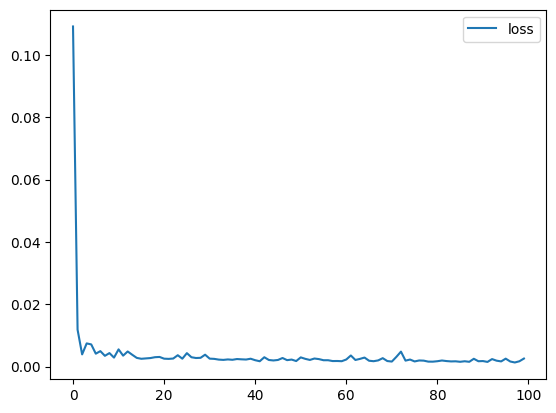

In [39]:
df_model_loss = pd.DataFrame(model.history.history)
df_model_loss.plot()

### Prediction for testing: Using TimeSeriesGenerator

In [40]:
batch_size1 = 1

In [41]:
test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)

### Predict Future Data Points for Testing

In [42]:
normalized_prediction = model.predict(test_tsGenerator60)

138/138 [==============================] - 2s 8ms/step


In [43]:
normalized_prediction

array([[0.89014447],
       [0.8936646 ],
       [0.89735   ],
       [0.9009193 ],
       [0.90457755],
       [0.90804696],
       [0.91111517],
       [0.91382957],
       [0.9159767 ],
       [0.9175633 ],
       [0.9185052 ],
       [0.9194742 ],
       [0.92029434],
       [0.9203805 ],
       [0.9198557 ],
       [0.91991574],
       [0.92046535],
       [0.92224455],
       [0.92503905],
       [0.9287637 ],
       [0.9335181 ],
       [0.9391033 ],
       [0.94530815],
       [0.95140815],
       [0.95740765],
       [0.9634169 ],
       [0.9700109 ],
       [0.97704405],
       [0.98420453],
       [0.9912012 ],
       [0.9971514 ],
       [1.0007228 ],
       [1.0029474 ],
       [1.0044886 ],
       [1.0055645 ],
       [1.0055771 ],
       [1.006408  ],
       [1.0069358 ],
       [1.0071454 ],
       [1.0080098 ],
       [1.0095862 ],
       [1.0124304 ],
       [1.0162355 ],
       [1.0208511 ],
       [1.0257831 ],
       [1.0308268 ],
       [1.0356913 ],
       [1.040

In [44]:
len(normalized_prediction)

138

In [45]:
prediction = scaler.inverse_transform(normalized_prediction)

In [46]:
prediction_index = np.arange(1244, 1382, step=1)
df_prediction = pd.DataFrame(data=prediction,index=prediction_index,columns=['Prediction'])

In [47]:
df_prediction

,Prediction
1244,62.545143
1245,62.695358
1246,62.852627
1247,63.004936
1248,63.161049
...,...
1377,66.825020
1378,66.912369
1379,66.977798
1380,67.029305


### Visualize Prediction

<AxesSubplot:>

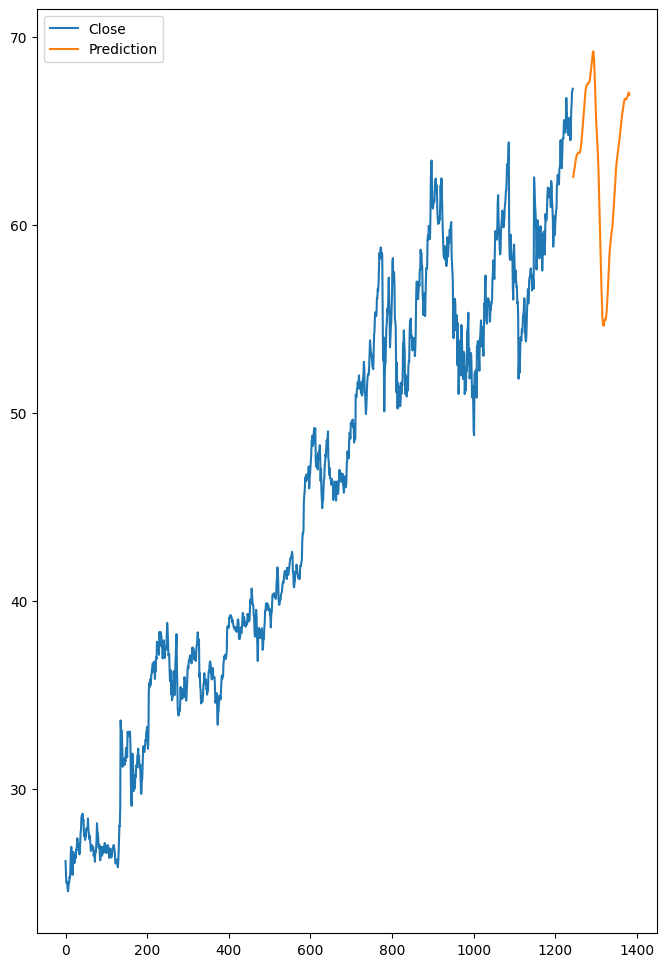

In [48]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8,12))

### visualize prediction and compare actual close price

<AxesSubplot:>

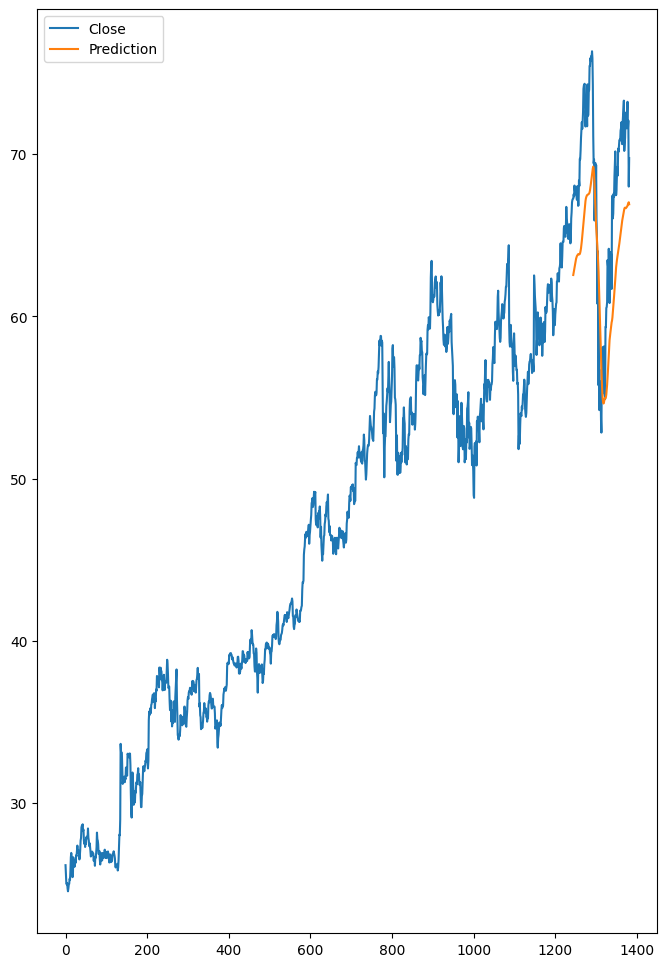

In [49]:
ax=df.plot()
df_prediction.plot(ax=ax, figsize=(8,12))

### Time series data Forecasting with LSTM

In [50]:
full_scaler=MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

In [51]:
length60

60

In [52]:
forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length60, batch_size=batch_size32)

### Build, Compile, and Fit LSTM Model for Forecasting

In [53]:
model.fit_generator(forecast_tsGenerator, epochs=100)

Epoch 1/100
 2/42 [>.............................] - ETA: 2s - loss: 0.0037    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


42/42 [==============================] - 3s 61ms/step - loss: 0.0015
Epoch 2/100
42/42 [==============================] - 2s 59ms/step - loss: 0.0020
Epoch 3/100
42/42 [==============================] - 2s 59ms/step - loss: 0.0012
Epoch 4/100
42/42 [==============================] - 3s 60ms/step - loss: 0.0013
Epoch 5/100
42/42 [==============================] - 3s 60ms/step - loss: 0.0014
Epoch 6/100
42/42 [==============================] - 3s 60ms/step - loss: 0.0014
Epoch 7/100
42/42 [==============================] - 3s 60ms/step - loss: 0.0016
Epoch 8/100
42/42 [==============================] - 3s 60ms/step - loss: 0.0011
Epoch 9/100
42/42 [==============================] - 3s 61ms/step - loss: 0.0012
Epoch 10/100
42/42 [==============================] - 2s 59ms/step - loss: 0.0012
Epoch 11/100
42/42 [==============================] - 2s 59ms/step - loss: 0.0011
Epoch 12/100
42/42 [==============================] - 3s 61ms/step - loss: 0.0013
Epoch 13/100
42/42 [=================

In [54]:
forecast = []
periods = 106
first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1,length60,n_features))
for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 26ms/step


In [55]:
forecast = full_scaler.inverse_transform(forecast)
forecast

array([[67.42091325],
       [66.43261664],
       [65.50650595],
       [64.67712891],
       [63.9457477 ],
       [63.29568867],
       [62.70473573],
       [62.15363227],
       [61.62634036],
       [61.11372545],
       [60.61527527],
       [60.13304199],
       [59.66942037],
       [59.22627124],
       [58.80486296],
       [58.4055998 ],
       [58.0274572 ],
       [57.66860516],
       [57.32675387],
       [56.99952713],
       [56.68463203],
       [56.38032189],
       [56.08543022],
       [55.798593  ],
       [55.51850486],
       [55.24415049],
       [54.97529538],
       [54.71149821],
       [54.45245039],
       [54.19794515],
       [53.94779735],
       [53.70183415],
       [53.46020679],
       [53.22285044],
       [52.98965401],
       [52.76126557],
       [52.53749995],
       [52.31813496],
       [52.10293298],
       [51.89168725],
       [51.68415397],
       [51.47994123],
       [51.27871573],
       [51.08039724],
       [50.88500427],
       [50

In [56]:
df

,Close
0,26.168653
1,25.623152
2,25.029282
3,24.986401
4,25.065184
...,...
1377,73.220497
1378,71.598503
1379,72.066498
1380,67.995003


In [57]:
forecast_index=np.arange(1382,1488,step=1)


In [58]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

In [59]:
forecast_df

,Forecast
1382,67.420913
1383,66.432617
1384,65.506506
1385,64.677129
1386,63.945748
...,...
1483,45.238754
1484,45.202609
1485,45.167533
1486,45.133487


<AxesSubplot:>

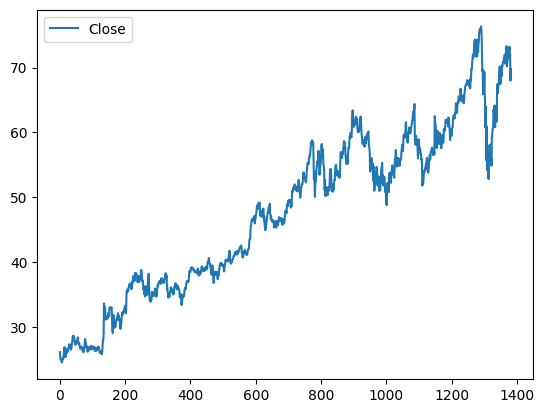

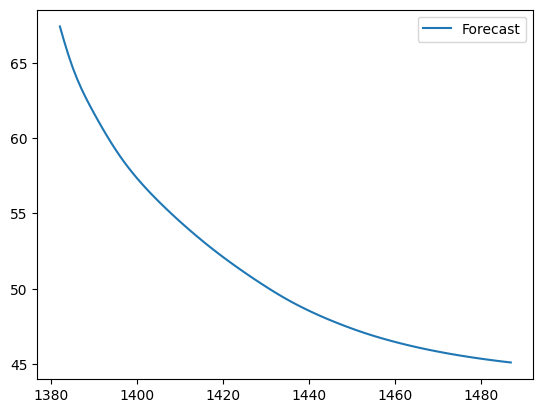

In [60]:
df.plot()
forecast_df.plot()

<AxesSubplot:>

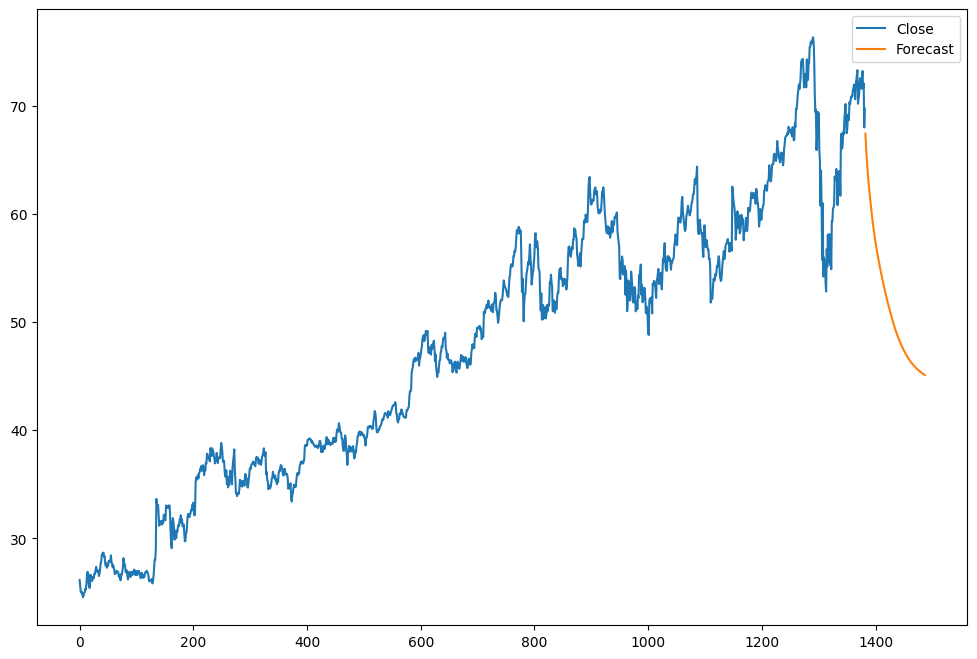

In [61]:
ax=df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))

In [62]:
dir_path_dataset_2 = 'GOOG_2.csv'

In [63]:
df_ALL_JUL_DEC_2019 = pd.read_csv(dir_path_dataset_2)


In [64]:
df_ALL_JUL_DEC_2019

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-30,110.499496,111.329803,107.309998,109.372498,109.372498,38046000
1,2022-07-01,108.336998,109.806351,107.105003,109.081001,109.081001,31028000
2,2022-07-05,107.514503,114.052597,106.249496,113.887001,113.887001,36398000
3,2022-07-06,114.092003,116.351997,112.250504,115.213501,115.213501,28852000
4,2022-07-07,116.008003,119.862000,115.533997,119.306000,119.306000,32184000
...,...,...,...,...,...,...,...
101,2022-11-22,96.160004,97.547997,94.410004,97.330002,97.330002,18868900
102,2022-11-23,97.339996,99.069000,97.339996,98.820000,98.820000,17568900
103,2022-11-25,98.464996,98.940002,97.529999,97.599998,97.599998,8567800
104,2022-11-28,97.199997,97.830002,95.889999,96.250000,96.250000,19974500


In [65]:
df_JUL_DEC_2019=df_ALL_JUL_DEC_2019.iloc[:,4:5]

In [66]:
df_JUL_DEC_2019

,Close
0,109.372498
1,109.081001
2,113.887001
3,115.213501
4,119.306000
...,...
101,97.330002
102,98.820000
103,97.599998
104,96.250000


<AxesSubplot:>

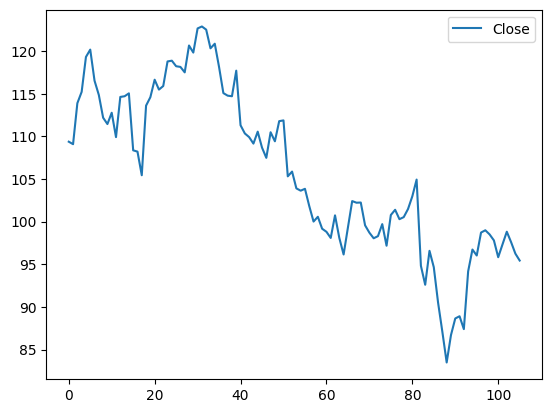

In [67]:
df_JUL_DEC_2019.plot()

In [68]:
forecast_df['Forecast'].values

array([67.42091325, 66.43261664, 65.50650595, 64.67712891, 63.9457477 ,
       63.29568867, 62.70473573, 62.15363227, 61.62634036, 61.11372545,
       60.61527527, 60.13304199, 59.66942037, 59.22627124, 58.80486296,
       58.4055998 , 58.0274572 , 57.66860516, 57.32675387, 56.99952713,
       56.68463203, 56.38032189, 56.08543022, 55.798593  , 55.51850486,
       55.24415049, 54.97529538, 54.71149821, 54.45245039, 54.19794515,
       53.94779735, 53.70183415, 53.46020679, 53.22285044, 52.98965401,
       52.76126557, 52.53749995, 52.31813496, 52.10293298, 51.89168725,
       51.68415397, 51.47994123, 51.27871573, 51.08039724, 50.88500427,
       50.69253683, 50.50296714, 50.31622268, 50.13259507, 49.9520797 ,
       49.77460403, 49.60201966, 49.43478796, 49.27295521, 49.11643037,
       48.96499743, 48.81837864, 48.67622992, 48.53832907, 48.40456191,
       48.27455041, 48.14803844, 48.02539013, 47.9062506 , 47.7902773 ,
       47.67718941, 47.56676936, 47.45881348, 47.35321993, 47.25

In [69]:
df_JUL_DEC_2019['Forecast']=forecast_df['Forecast'].values

In [70]:
df_JUL_DEC_2019

,Close,Forecast
0,109.372498,67.420913
1,109.081001,66.432617
2,113.887001,65.506506
3,115.213501,64.677129
4,119.306000,63.945748
...,...,...
101,97.330002,45.238754
102,98.820000,45.202609
103,97.599998,45.167533
104,96.250000,45.133487


<AxesSubplot:>

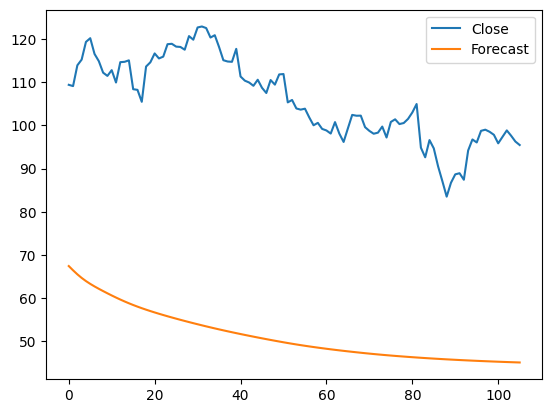

In [71]:
df_JUL_DEC_2019.plot()